# Segmentation Using Deep Learning Models

There are broadly two ways we can approach the segmentation problem when it comes to segmenting images for real life usecases

- Semantic Segmentation
- Instance Segmentation

<figure>
    <img src="https://miro.medium.com/max/1400/1*z89KwWbF59XXrsXXQCECPA.jpeg" width = 700px/>
    <figcaption style = "text-align:center">IOU Visualization. Ref: 
        <a href="https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e">TowardsDataScience</a>
    </figcaption>
</figure>

In [10]:
import cv2
import matplotlib.pyplot as plt

In [45]:
image = cv2.cvtColor(cv2.imread('..//assets//images//bombay-1.jpg'), cv2.COLOR_BGR2RGB)
semantic_map = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//bombay-1_semantic_seg.png'), cv2.COLOR_BGR2RGB)
instance_map = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//bombay-1.png'), cv2.COLOR_BGR2RGB)

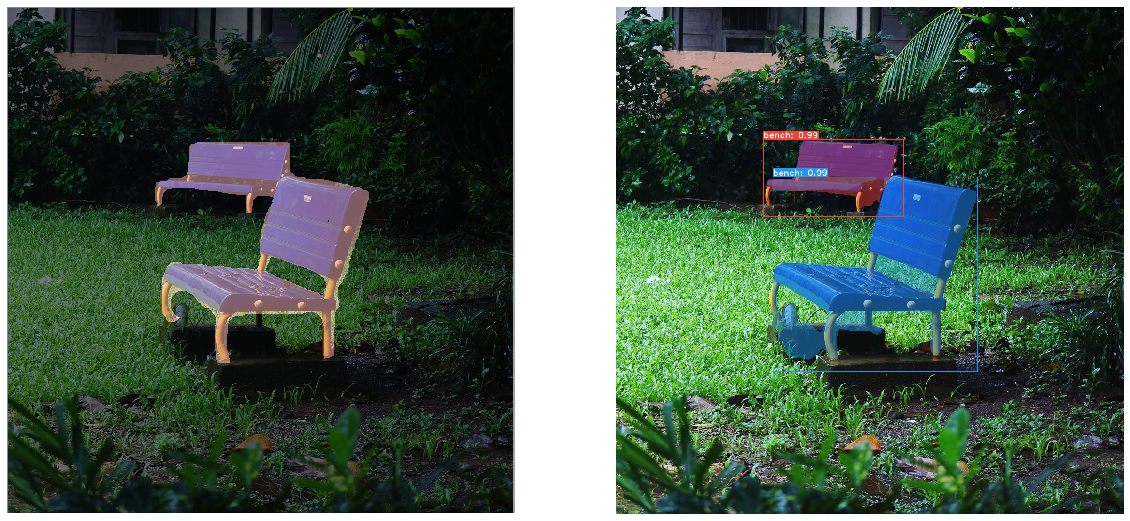

In [50]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].imshow(semantic_map)
ax[1].imshow(instance_map)
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## From Convolutional Neural Nets to "Fully" Convolutional Neural Nets

Let's discuss an important paper in the history of semantic segmentation and see what we can learn from it. 

## [Long Fully Convolutional Networks](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)
### Jonathan Long, Evan Shelhamer, Trevor Darrell
### CVPR 2015

<figure>
    <img src="../assets/papers/fcn-1.jpg" width = 700px/>
    <figcaption style = "text-align:center">Transforming Fully Connected layer into convolutional layer. Ref:
        <a href="https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf">FCN CVPR 2015</a>
    </figcaption>
</figure>

#### Salient Points

- Fully connected layers can also be viewed as convolutions with kernels that cover their entire input regions. Doing so casts them into fully convolutional networks that take input of any size and output classification maps.

- The spatial output maps of these convolutionalized models make them a natural choice for dense problems like semantic segmentation.

- The classification nets subsample to keep filters small and computational requirements reasonable. This coarsens the output of a fully convolutional version of these nets, reducing it from the size of the input by a factor equal to the pixel stride of the receptive fields of the output units.

- In-network upsampling is fast and effective for learning dense prediction. Upsampling with factor f is convolution with a fractional input stride of 1/f. So long as f is integral, a natural way to upsample is therefore backwards convolution (sometimes called deconvolution) with an output stride of f. Such an operation is trivial to implement, since it simply reverses the forward and backward passes of convolution. Thus upsampling is performed in-network for end-to-end learning by backpropagation from the pixelwise loss.

- Training with sampling does not yield faster or better convergence for dense prediction. Whole image training is effective and efficient.

- To improve the coarse nature of the predictions obtained from fully convolutinal network, skip connections are introduced.

<figure>
    <img src="../assets/papers/fcn-2.jpg" width = 900px/>
    <figcaption style = "text-align:center">FCN with Skip Connections. Ref:
        <a href="https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf">FCN CVPR 2015</a>
    </figcaption>
</figure>

- First divide the output stride in half by predicting from a 16 pixel stride layer. We add a 1 × 1 convolution layer on top of pool4 to produce additional class predictions. We fuse this output with the predictions computed on top of conv7 (convolutionalized fc7) at stride 32 by adding a 2× upsampling layer and summing6 both predictions (see Figure 3). We initialize the 2× upsampling to bilinear interpolation, but allow the parameters to be learned as described in Section 3.3. Finally, the stride 16 predictions are upsampled back to the image. We call this net FCN-16s. FCN-16s is learned end-to-end, initialized with the parameters of the last, coarser net, which we now call FCN-32s. The new parameters acting on pool4 are zeroinitialized so that the net starts with unmodified pre

<figure>
    <img src="../assets/papers/fcn-3.jpg" width = 600px/>
    <figcaption style = "text-align:center">Results obtained from skip connections. Ref:
        <a href="https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf">FCN CVPR 2015</a>
    </figcaption>
</figure>

## Transposed Convolutions / Fractionally Strided Convolution / Deconvolution

<figure>
    <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides_transposed.gif" width = 300px/>
    <figcaption style = "text-align:center">Transpose Conv with No Padding and No Strides. Ref:
        <a href="https://github.com/vdumoulin/conv_arithmetic">Convolutional Arithmetic</a>
    </figcaption>
</figure>

- This operation is used to upsample a matrix to larger matrix. In case of segmentation from a feature map of lower size to a feature map of higher size. 

- This operation helps the network learn and produce finer results and smoother predictions at pixel level.

## [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/pdf/1505.04597.pdf)
### Olaf Ronneberger, Philipp Fischer, and Thomas Brox

<figure>
    <img src="https://miro.medium.com/max/1400/1*f7YOaE4TWubwaFF7Z1fzNw.png" width = 700px/>
    <figcaption style = "text-align:center">U-Net Architecture. Ref:
        <a href="https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5">U-Net Line by Line Explanation</a>
    </figcaption>
</figure>

#### Salient Points

-  In order to localize, high resolution features from the contracting path are combined with the upsampled output. A successive convolution layer can then learn to assemble a more precise output based on this information.

- One important modification in our architecture is that in the upsampling part we have also a large number of feature channels, which allow the network to propagate context information to higher resolution layers. As a consequence, the expansive path is more or less symmetric to the contracting path, and yields a u-shaped architecture.

- Another challenge in many cell segmentation tasks is the separation of touching objects of the same class. To this end, we propose the use of a weighted loss, where the separating background labels between touching cells obtain a large weight in the loss function.

<figure>
    <img src="../assets/papers/unet-1.JPG" width = 700px/>
    <figcaption style = "text-align:center">U-Net Architecture. Ref:
        <a href="https://arxiv.org/pdf/1505.04597.pdf">U-Net Arxiv</a>
    </figcaption>
</figure>